In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme()
pd.set_option('display.max_columns' , None)

In [ ]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
X = wine_quality.data.features 
y = wine_quality.data.targets 
  
# metadata 
print(wine_quality.metadata) 
  
# variable information 
print(wine_quality.variables) 

In [81]:
df = X.join(y)

In [82]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


### Univariate Analysis
1. distribution check (histogram)
2. outlier check (box Plot)

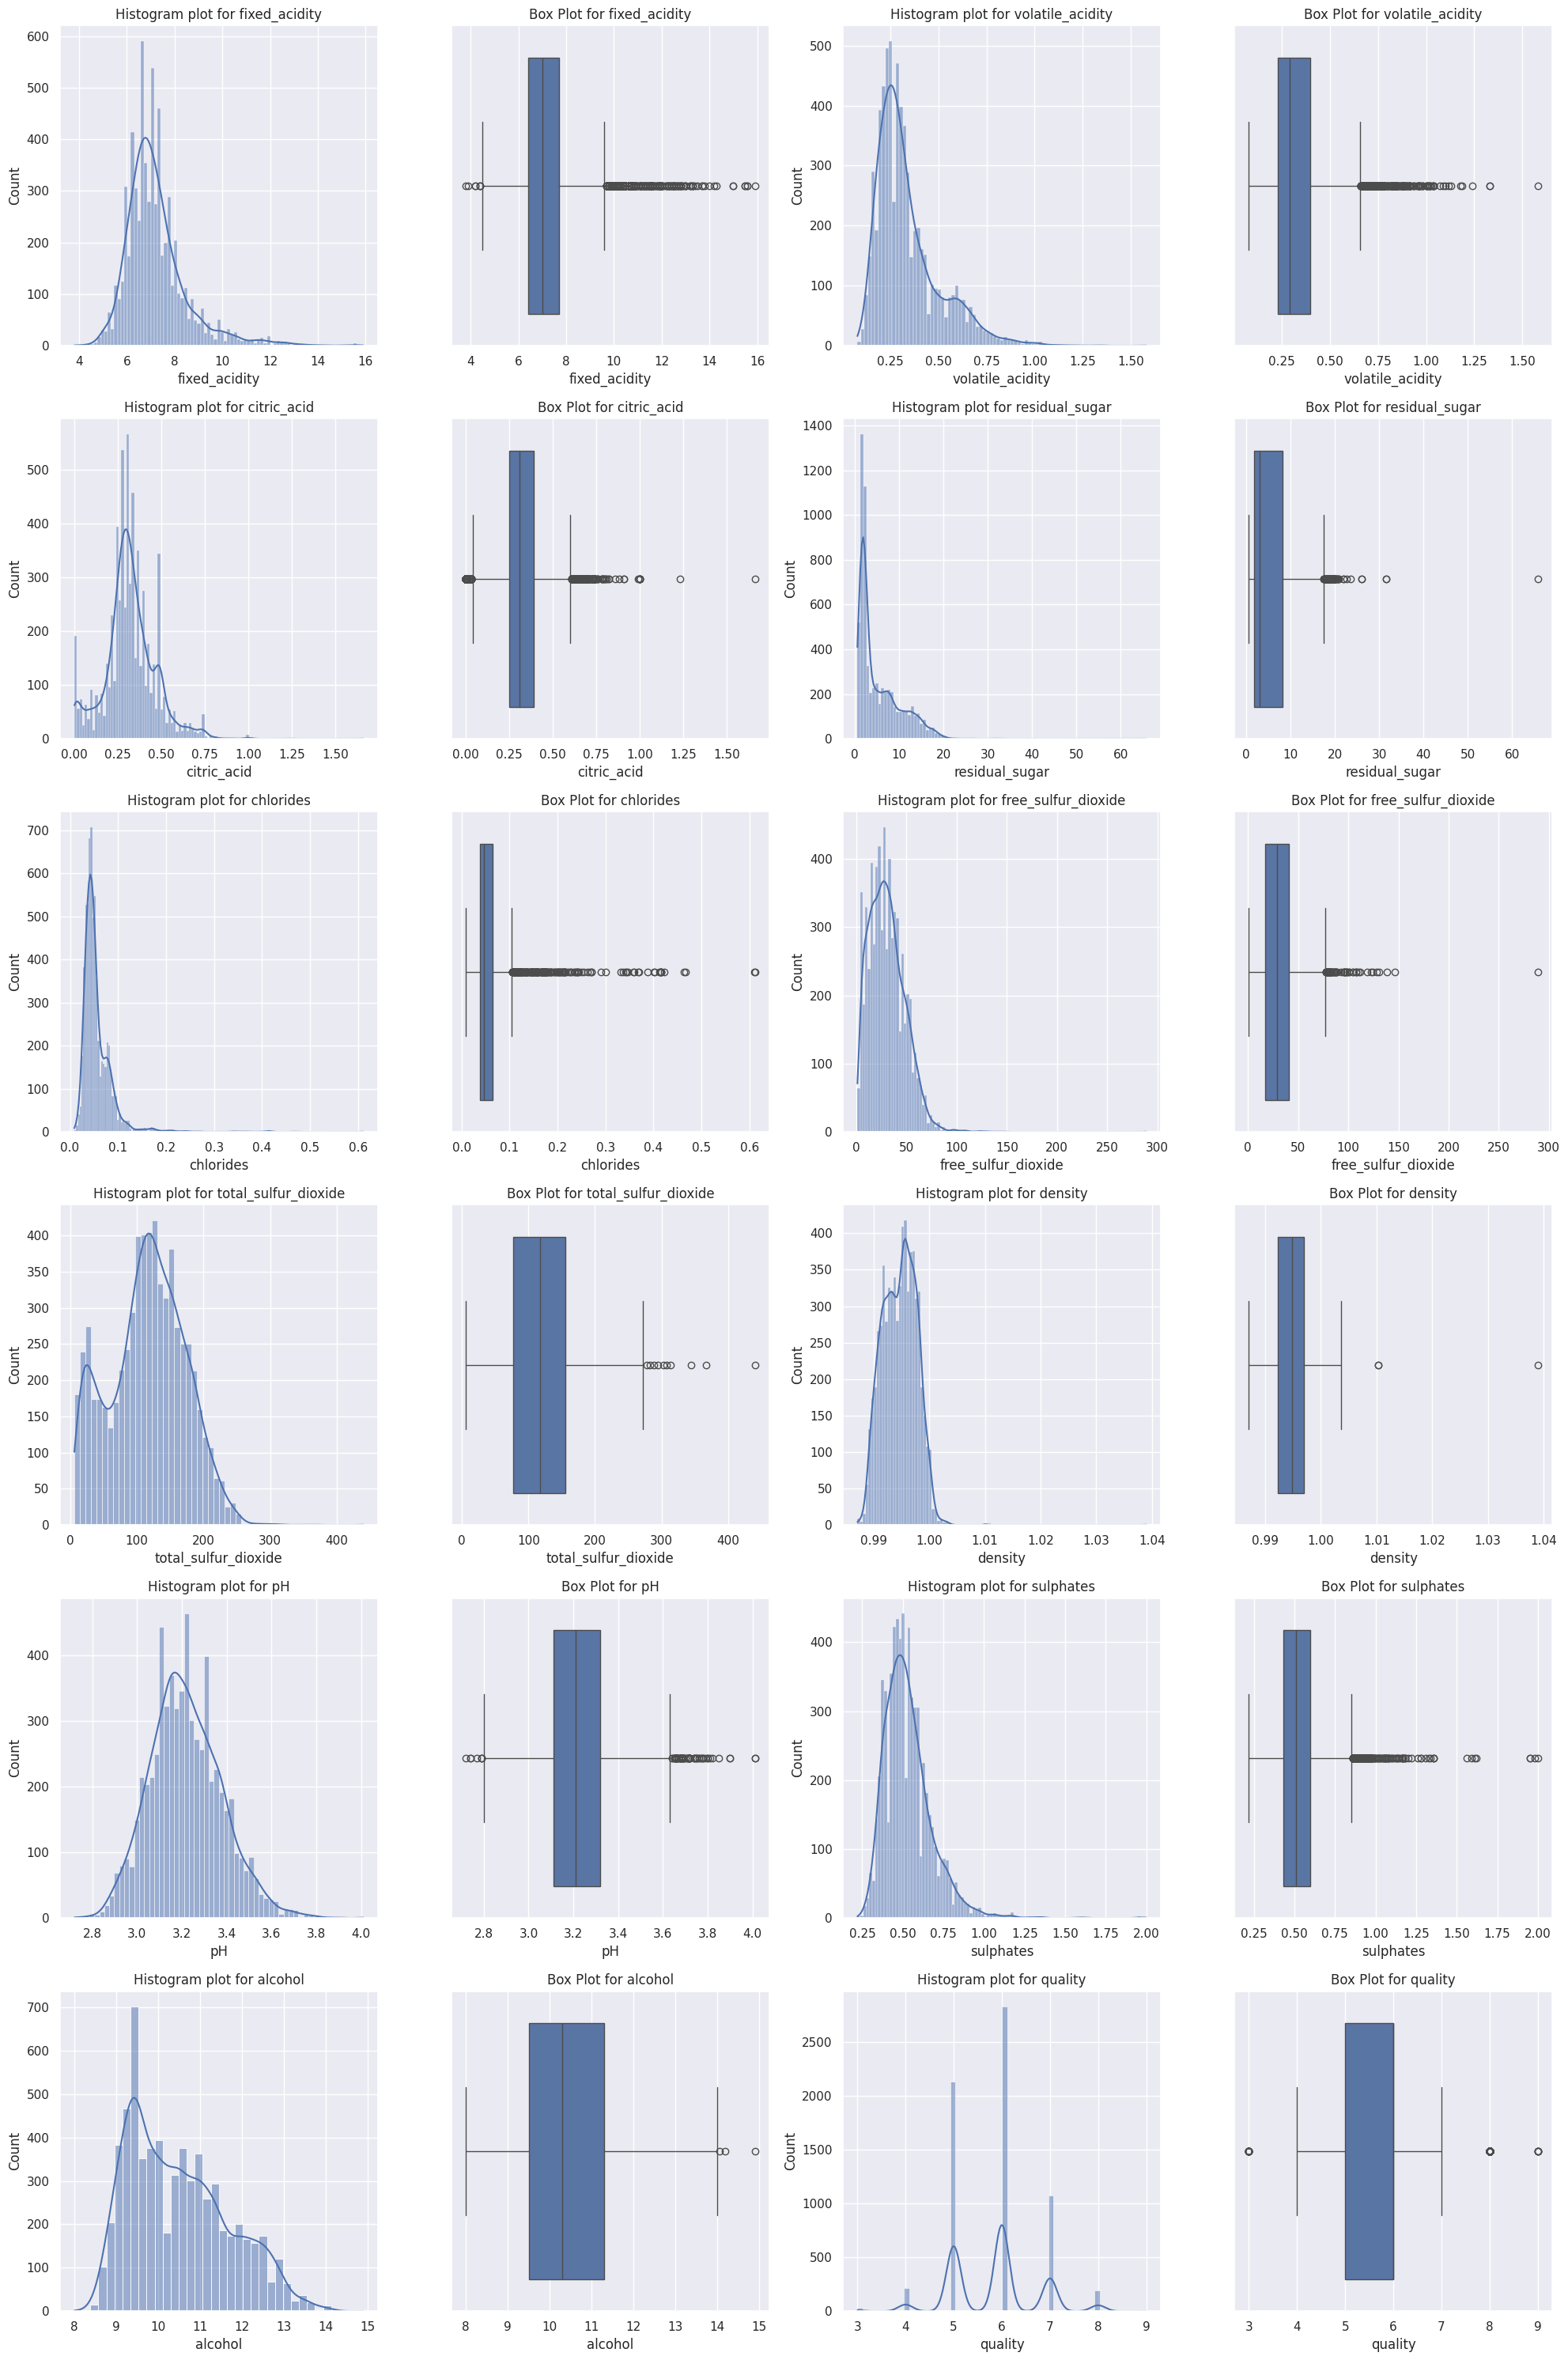

In [84]:
# in one row we will display 2 features
nrows , ncols = 6 , 4
fig , axes = plt.subplots(nrows , ncols , figsize = (20, 5*nrows))

axes = axes.flatten()
idx = 0

for col in df.columns :

    sns.histplot(data = df , x = col , kde = True , ax= axes[idx])
    axes[idx].set_title(f'Histogram plot for {col}')
    idx += 1

    sns.boxplot(data = df , x = col , ax = axes[idx])
    axes[idx].set_title(f'Box Plot for {col}')
    idx += 1

plt.tight_layout()
plt.show()

**Keeping A Note of skewed distribution**

In [85]:
df.skew()

fixed_acidity           1.723290
volatile_acidity        1.495097
citric_acid             0.471731
residual_sugar          1.435404
chlorides               5.399828
free_sulfur_dioxide     1.220066
total_sulfur_dioxide   -0.001177
density                 0.503602
pH                      0.386839
sulphates               1.797270
alcohol                 0.565718
quality                 0.189623
dtype: float64

Before we apply any transformation we have to keep a note that transformation should be applicable i.e for log no -ve values

In [86]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [87]:
from sklearn.base import BaseEstimator , TransformerMixin

class LogTransformer(BaseEstimator , TransformerMixin) :
    """
    A custom transformer for applying log1p (log(1+x)) transformation
    to specified columns of a Dataframe
    """
    def __init__(self , features = None):

        self.features = features

    def fit(self , X , y = None):
        #nothing to learn , just for log transformation , req by sklearn api
        return self
    
    def transform(self , X):
        X_transformed = X.copy()
        if self.features:
            for feature in self.features:
                # check if that feature exist or not
                if feature in X_transformed.columns:

                    # before applying we have to know that there is no negative value
                    if (X_transformed[feature] < 0).any():
                        raise ValueError(f'Feature {feature} contains neg Values')
                    X_transformed[feature] = np.log1p(X_transformed[feature])
                
                else :
                    # feaure not present
                    print(f'Warning : feature missing {feature}')

        else : 
            # no specific column given try to transform all numeric columns
            numberic_cols = X_transformed.select_dtypes(include = np.number).columns
            for feature in numberic_cols:
                if (X_transformed[feature] < 0).any():
                    raise ValueError(f'Feature {feature} contains neg Values')
                X_transformed[feature] = np.log1p(X_transformed[feature])
        
        return X_transformed

In [88]:
from sklearn.pipeline import Pipeline

log_trans_features = df.skew()[df.skew() >= 0.5].index.tolist()

pipe = Pipeline(steps=[
    ('log_transformation' , LogTransformer(features=log_trans_features))
])

array([[<Axes: title={'center': 'fixed_acidity'}>,
        <Axes: title={'center': 'volatile_acidity'}>,
        <Axes: title={'center': 'residual_sugar'}>],
       [<Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free_sulfur_dioxide'}>,
        <Axes: title={'center': 'density'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>, <Axes: >]], dtype=object)

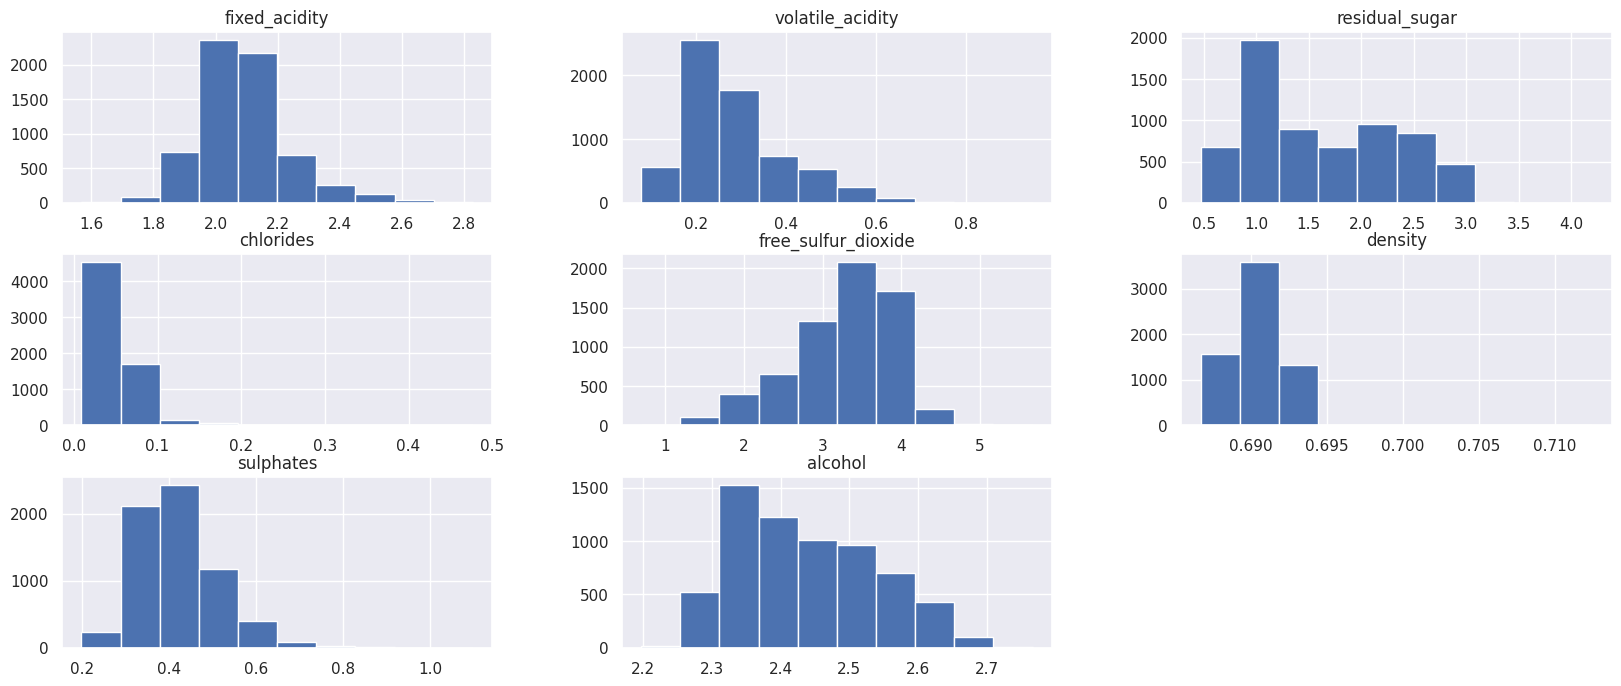

In [89]:
pipe.fit_transform(df)[log_trans_features].hist(figsize = (20,8))

In [90]:
# build the complete pipeline
from sklearn.preprocessing import StandardScaler

pipe = Pipeline(steps=[
    ('log_transform' , LogTransformer(features= log_trans_features)),
    ('scaling' , StandardScaler())
])

In [91]:
pipe.fit_transform(df)

array([[ 0.22950885,  2.13576712, -2.19283252, ...,  0.25035491,
        -0.9298923 , -0.93722961],
       [ 0.55026134,  3.01281731, -2.19283252, ...,  1.05921332,
        -0.5588698 , -0.93722961],
       [ 0.55026134,  2.43803172, -1.91755268, ...,  0.86254865,
        -0.5588698 , -0.93722961],
       ...,
       [-0.55188509, -0.61378015, -0.88525328, ..., -0.47273022,
        -0.9298923 ,  0.20799905],
       [-1.53855612, -0.26929172, -0.12823371, ..., -1.08779963,
         1.8509118 ,  1.35322771],
       [-1.02758646, -0.82720524,  0.42232597, ..., -1.57297257,
         1.11139565,  0.20799905]], shape=(6497, 12))

In [112]:
# train test split
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(
    X,
    y['quality'],
    test_size= 0.2,
    random_state= 42
)

In [113]:
X_train_trans = pipe.fit_transform(X_train)
X_test_trans = pipe.transform(X_test)

In [117]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=100)
lr.fit(X_train , y_train)
lr.score(X_test , y_test)

/home/kasim/Projects/Machine-Learning-Projects/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.47615384615384615

In [146]:
from sklearn.ensemble import RandomForestClassifier

# Create a much "lighter" version of the model for testing
rf_light = RandomForestClassifier(
    n_estimators=100,      # Start with a much smaller number of trees
    max_depth=20,         # Limit the depth of each tree
    n_jobs=-1,            # Use all cores (this is fine now for one model)
    random_state=42
)

print("Training a lighter Random Forest model...")
# Now try to fit this lighter model
rf_light.fit(X_train , y_train)

print("Training complete!")

# Check the score
score = rf_light.score(X_test, y_test)
print(f"Score of the lighter model: {score}")

Training a lighter Random Forest model...
Training complete!
Score of the lighter model: 0.683076923076923
